# Climate Change -- Term Project


In [2]:
%matplotlib inline
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - MAIN - [%(name)s] [%(levelname)s] : %(message)s')
import sys
import os
sys.path.append('../modules')
import copy
import matplotlib.pyplot as plt
import plumbing
import testing
import boxcox

DATA_DIR = '../data/'
DB_DIR = '../db/'

import pandas as pd
from scipy import stats
import statsmodels.api as sm
import random
from scipy.stats import ttest_1samp
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
import prettytable
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [139]:
import psycopg2
import psycopg2.extras

def get_conn(host='sanjose',user='student',db='atlas'):
    cmd = "host=%s user=%s dbname=%s " % (host, user, db)
    try:
        db = psycopg2.connect(cmd)
        return db
    except:
        logging.warning('unable to connect to psql db : %' % cmd)
        sys.exit(1)

In [4]:
conn = get_conn()
crb = pd.read_sql_query("select * from student_weather where region='crb';", conn)
cali = pd.read_sql_query("select * from student_weather where region='cali';", conn)
grb = pd.read_sql_query("select * from student_weather where region='grb';", conn)
color = pd.read_sql_query("select * from student_weather where region='color';", conn)
rio = pd.read_sql_query("select * from student_weather where region='rio';", conn)
mo = pd.read_sql_query("select * from student_weather where region='mo';", conn)
ark = pd.read_sql_query("select * from student_weather where region='ark';", conn)
gulf = pd.read_sql_query("select * from student_weather where region='gulf';", conn)
glakes = pd.read_sql_query("select * from student_weather where region='glakes';", conn)
up = pd.read_sql_query("select * from student_weather where region='up';", conn)
low = pd.read_sql_query("select * from student_weather where region='low';", conn)
ohio = pd.read_sql_query("select * from student_weather where region='ohio';", conn)
east = pd.read_sql_query("select * from student_weather where region='east';", conn)
mex = pd.read_sql_query("select * from student_weather where region='mex';", conn)
conn.close()

crb.to_csv('crb_df.csv')
cali.to_csv('cali_df.csv')
grb.to_csv('grb_df.csv')
color.to_csv('color_df.csv')
rio.to_csv('rio_df.csv')
mo.to_csv('mo_df.csv')
ark.to_csv('ark_df.csv')
gulf.to_csv('gulf_df.csv')
glakes.to_csv('glakes_df.csv')
up.to_csv('up_df.csv')
low.to_csv('low_df.csv')
ohio.to_csv('ohio_df.csv')
east.to_csv('east_df.csv')
mex.to_csv('mex_df.csv')

In [5]:
regions = [crb, cali, grb, color, rio, mo, ark, gulf, glakes, up, low, ohio, east, mex]
for region in regions:
    region['date'] = pd.to_datetime(region['date'])
    region['year'] = region['date'].dt.year
    region['month'] = region['date'].dt.month

---

regions = ['crb', 'cali', 'grb', 'color', 'rio', 'mo', 'ark', 'gulf', 'glakes', 'up', 'low', 'ohio', 'east']
for region in regions:
    print('{} = pd.read_csv('{}')'.format(region)

### 1. Show your "best" visualization(s) -- what effects are revealed through this view of the data?

In [6]:
cali.groupby('year')['max_temp','min_temp'].mean()

max_temp  min_temp
year                     
1949  20.277403  4.118844
1950  21.140075  5.286304
1951  20.572924  4.890699
1952  20.145252  4.744059
1953  20.584594  4.741015
...         ...       ...
2006  20.842021  5.733237
2007  21.249149  5.567259
2008  21.149562  5.624482
2009  21.080194  5.640249
2010  19.981705  5.777042

[62 rows x 2 columns]

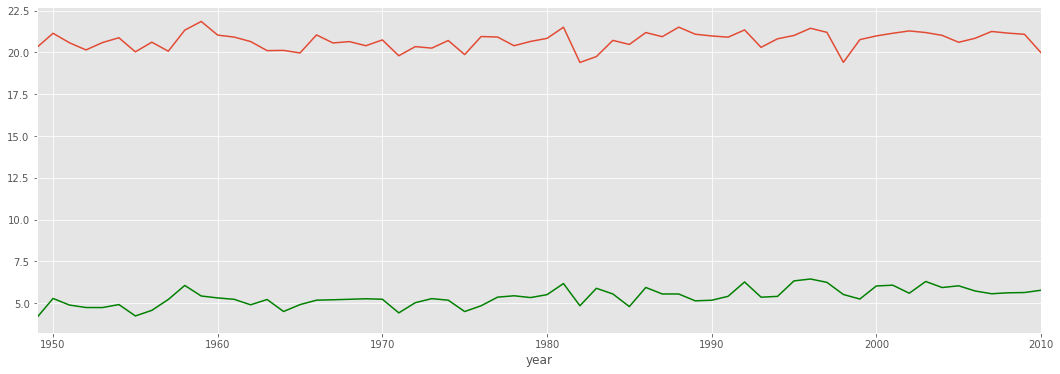

In [7]:
ax = plt.gca()

cali.groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',
                                             ax=ax, label='max')
cali.groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp', 
                                             color='green',ax=ax, label='min')

fig = plt.gcf()
fig.set_size_inches(18, 6)

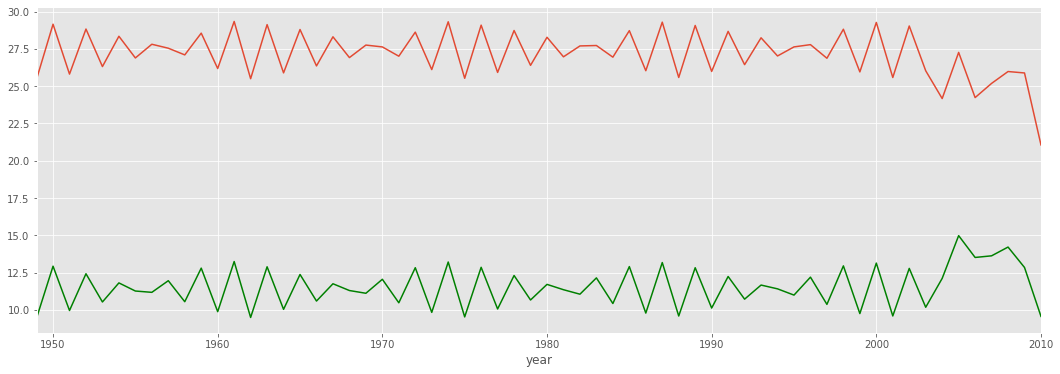

In [8]:
ax = plt.gca()

mex.groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',
                                             ax=ax, label='max')
mex.groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp', 
                                             color='green',ax=ax, label='min')

fig = plt.gcf()
fig.set_size_inches(18, 6)

In [9]:
len(regions)

14

In [10]:
cali.head()

record_id region  latitude  longitude       date  precipitation  max_temp  \
0    2975282   cali   32.4375  -114.8125 1951-02-01           0.00     22.51   
1    2975379   cali   32.4375  -114.8125 1959-03-01           0.00     28.43   
2    2975380   cali   32.4375  -114.8125 1959-04-01           0.08     32.67   
3    2975381   cali   32.4375  -114.8125 1959-05-01           0.03     32.87   
4    2975382   cali   32.4375  -114.8125 1959-06-01           0.03     40.87   

   min_temp  wind  year  month  
0      5.77  2.59  1951      2  
1      9.50  2.90  1959      3  
2     13.70  2.63  1959      4  
3     15.18  3.22  1959      5  
4     21.36  3.41  1959      6

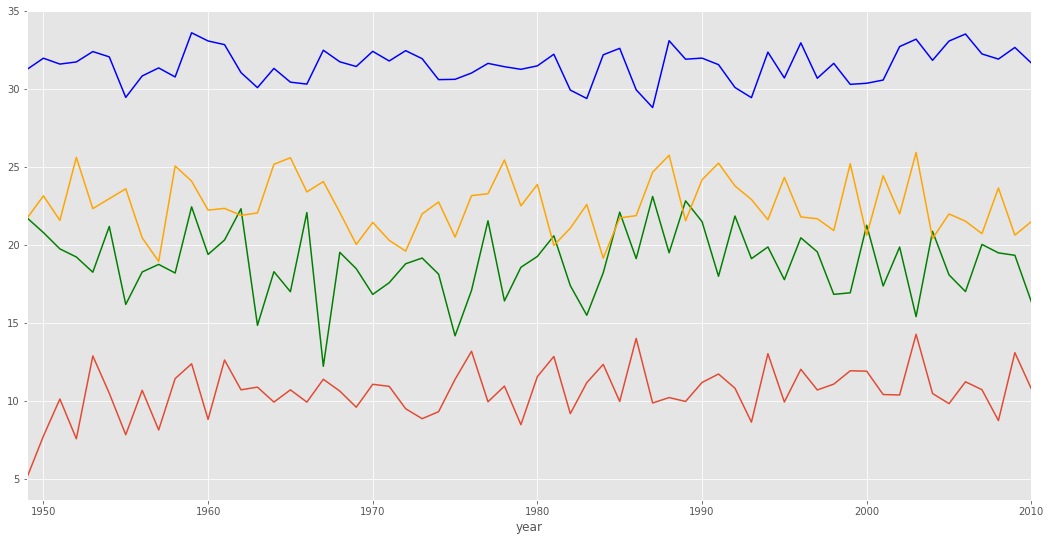

In [11]:
# Cali max avg temp by month
ax = plt.gca()

cali[cali.month==1].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',ax=ax,label='Jan')
cali[cali.month==4].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                            ax=ax,color='green',label='Apr')
cali[cali.month==7].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                            ax=ax, color='blue', label='Jul')
cali[cali.month==10].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                             ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

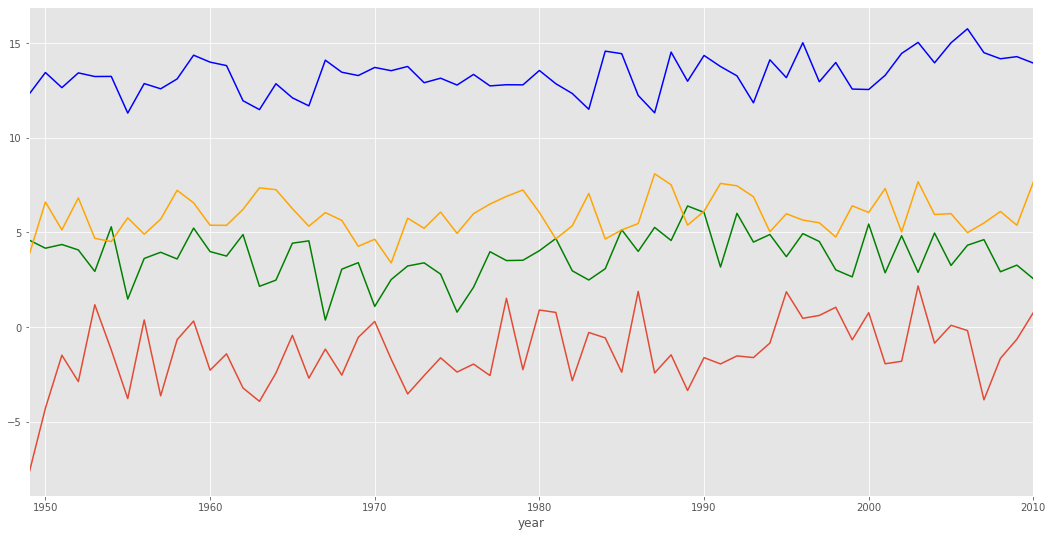

In [12]:
# Cali min avg temp by month
ax = plt.gca()

cali[cali.month==1].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',ax=ax,label='Jan')
cali[cali.month==4].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                            ax=ax,color='green',label='Apr')
cali[cali.month==7].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                            ax=ax, color='blue', label='Jul')
cali[cali.month==10].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                             ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

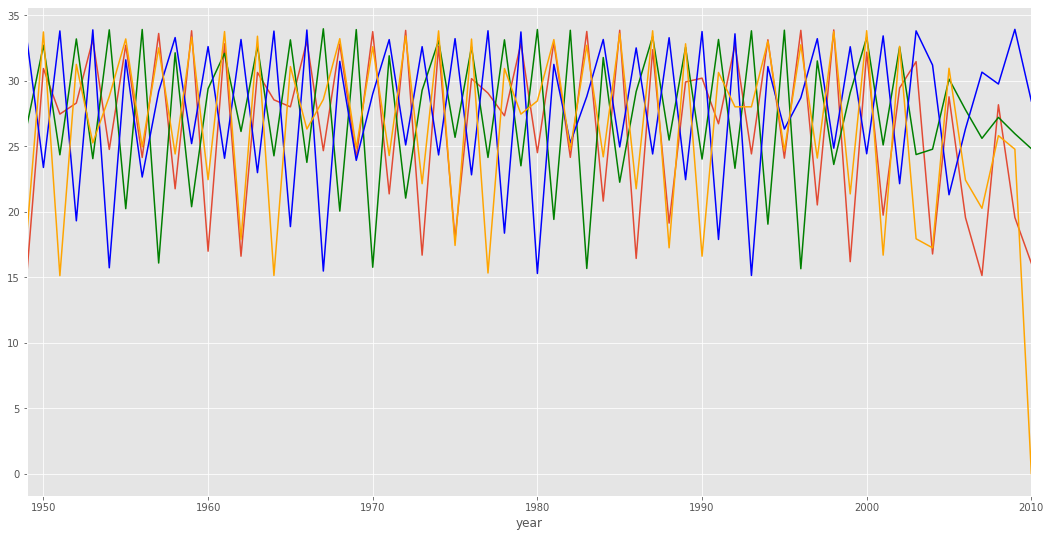

In [13]:
# Mex max avg temp by month
ax = plt.gca()

mex[mex.month==1].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',ax=ax,label='Jan')
mex[mex.month==4].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                            ax=ax,color='green',label='Apr')
mex[mex.month==7].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                            ax=ax, color='blue', label='Jul')
mex[mex.month==10].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                             ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

## Is mex problematic? Do we want to exclude mex data?

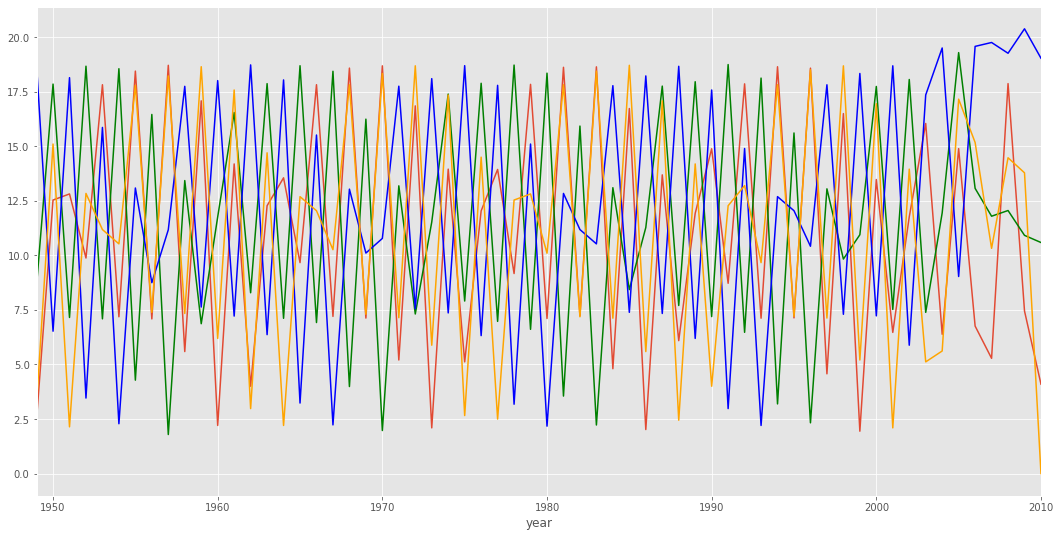

In [14]:
# Mex min avg temp by month
ax = plt.gca()

mex[mex.month==1].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',ax=ax,label='Jan')
mex[mex.month==4].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                            ax=ax,color='green',label='Apr')
mex[mex.month==7].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                            ax=ax, color='blue', label='Jul')
mex[mex.month==10].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                             ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

In [15]:
mex.head()

record_id region  latitude  longitude       date  precipitation  max_temp  \
0   26840545    mex   25.0625  -100.0625 1949-01-01          12.43     16.57   
1   26840546    mex   25.0625  -100.0625 1949-02-01          19.10     20.57   
2   26840547    mex   25.0625  -100.0625 1949-03-01           0.12     23.43   
3   26840548    mex   25.0625  -100.0625 1949-04-01          46.33     23.37   
4   26840549    mex   25.0625  -100.0625 1949-05-01          18.20     27.75   

   min_temp  wind  year  month  
0      4.45  5.36  1949      1  
1      8.63  5.10  1949      2  
2     10.27  4.86  1949      3  
3     10.80  5.26  1949      4  
4     16.63  5.50  1949      5

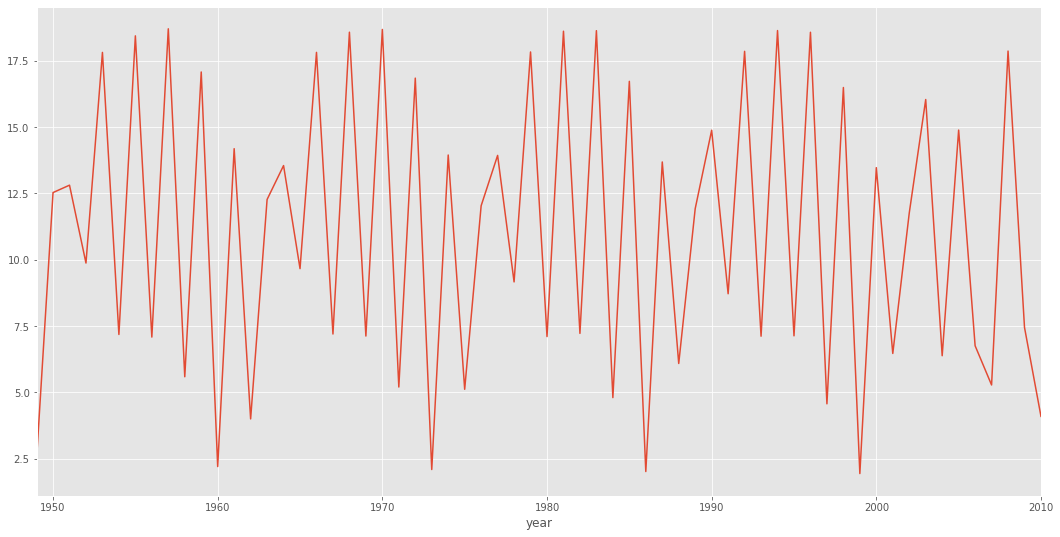

In [16]:
# Mex min avg temp by month
ax = plt.gca()

mex[mex.month==1].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',ax=ax,label='Jan')
# mex[mex.month==4].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
#                                                             ax=ax,color='green',label='Apr')
# mex[mex.month==7].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
#                                                             ax=ax, color='blue', label='Jul')
# mex[mex.month==10].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
#                                                              ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

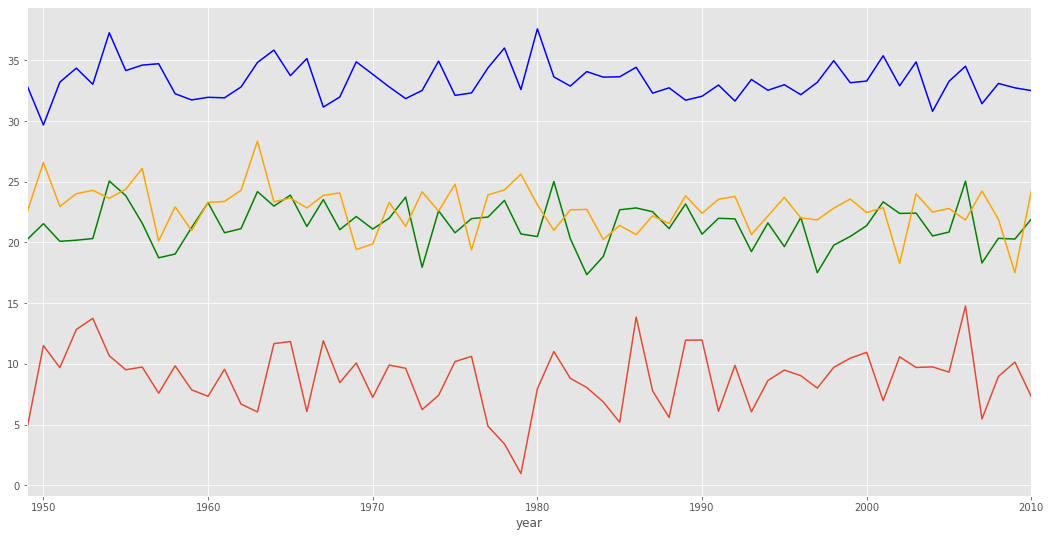

In [17]:
# ark max avg temp by month
ax = plt.gca()

ark[ark.month==1].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',ax=ax,label='Jan')
ark[ark.month==4].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                            ax=ax,color='green',label='Apr')
ark[ark.month==7].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                            ax=ax, color='blue', label='Jul')
ark[ark.month==10].groupby('year')['max_temp'].mean().plot(kind='line',x='year',y='max_temp',\
                                                             ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

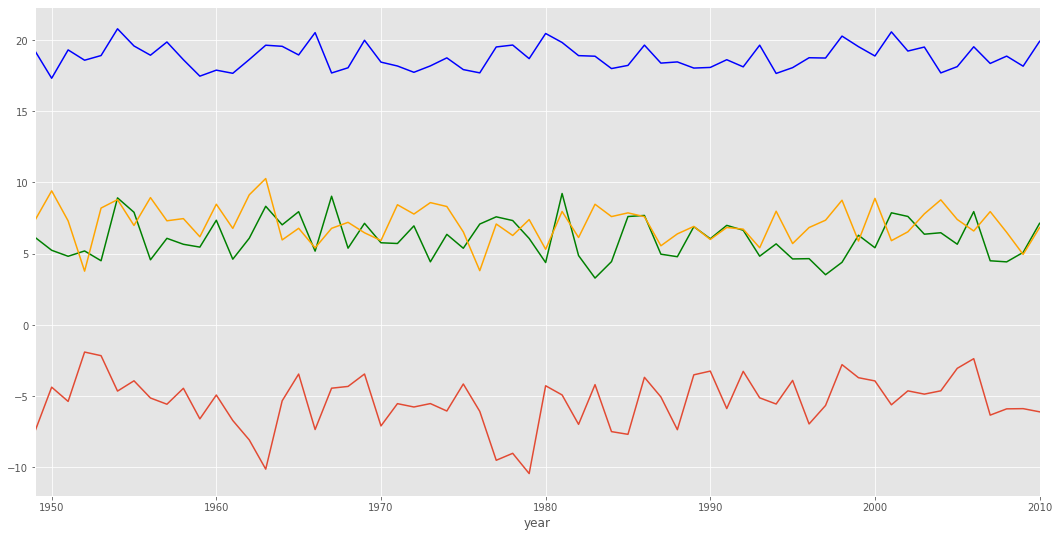

In [18]:
# ark min avg temp by month
ax = plt.gca()

ark[ark.month==1].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',ax=ax,label='Jan')
ark[ark.month==4].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                            ax=ax,color='green',label='Apr')
ark[ark.month==7].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                            ax=ax, color='blue', label='Jul')
ark[ark.month==10].groupby('year')['min_temp'].mean().plot(kind='line',x='year',y='min_temp',\
                                                             ax=ax, color='orange', label='Sep')

fig = plt.gcf()
fig.set_size_inches(18, 9)

---

In [22]:
def query(text):
    conn = create_connection()
    df = pd.read_sql_query(text, conn)
    conn.close()
    return df
def create_connection():
    conn = None
    try:
            conn = psycopg2.connect(host = "sanjose",
                                    database = "atlas", 
                                    user = "student")
            return conn
    except Error as e:
        print (e)
        
    return conn

In [188]:
df_loction_avg = query('''
            select latitude,longitude, avg(min_temp) as min_temp, avg(max_temp) as max_temp, 
            avg(precipitation) as precipitation, avg(wind) as wind
            from student_weather 
            where  region <> 'mex'
            group by latitude,longitude;
           ''')

In [189]:
df_loction_avg.head()

latitude  longitude   min_temp   max_temp  precipitation      wind
0   25.1875   -81.0625  19.385175  28.787513     105.147366  6.035013
1   25.1875   -80.9375  19.207487  28.740497     105.391573  6.057970
2   25.1875   -80.8125  19.309704  28.804637     109.237433  6.081868
3   25.1875   -80.6875  19.586237  28.928522     111.880444  6.106667
4   25.3125   -81.0625  18.907970  29.083105     108.067379  6.016250

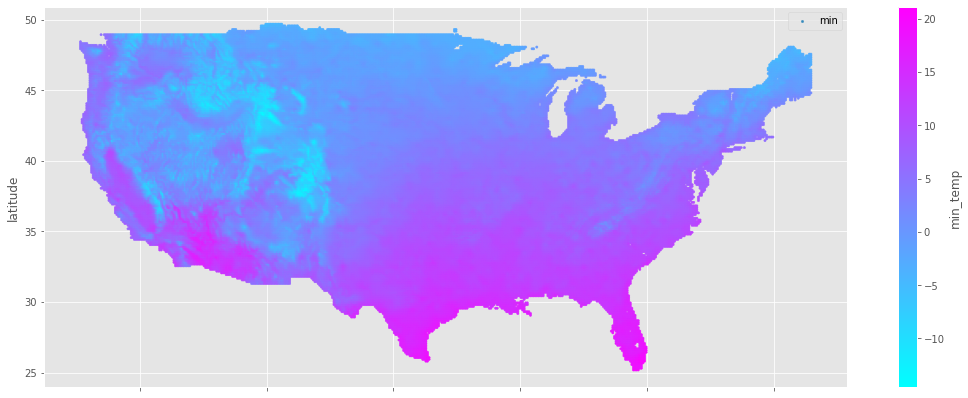

In [48]:
df_loction_avg.plot(kind="scatter", x='longitude', y='latitude',
    s=5, label="min",
    c="min_temp", cmap=plt.get_cmap("cool"),
    colorbar=True, alpha=1, figsize=(18,7),
)
plt.legend()
plt.show()

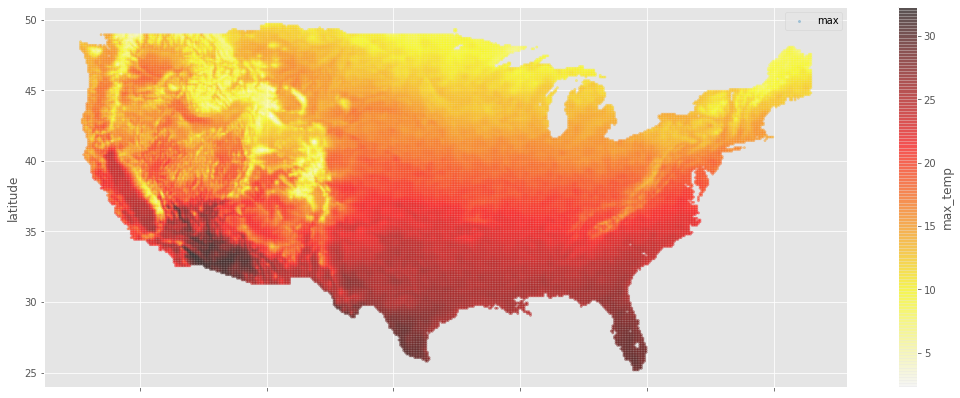

In [237]:
df_loction_avg.plot(kind="scatter", x='longitude', y='latitude',
    s=5, label="max",
    c="max_temp", cmap=plt.get_cmap("hot_r"),
    colorbar=True, alpha=0.4, figsize=(18,7),
)
plt.legend()
plt.show()

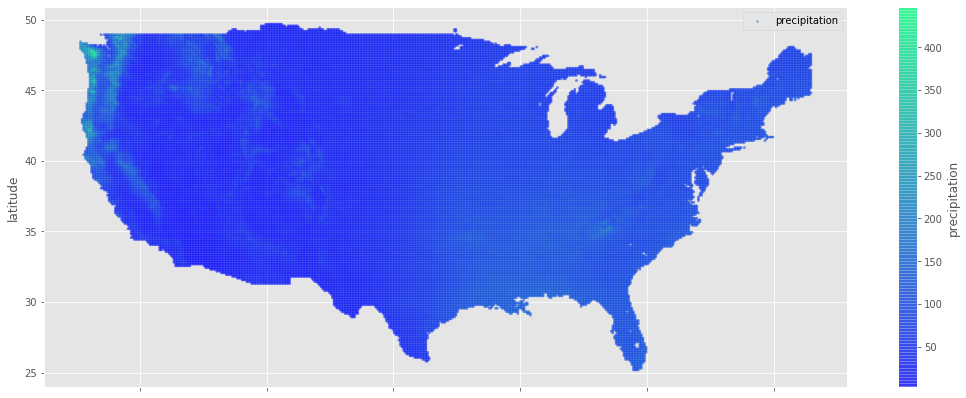

In [192]:
df_loction_avg.plot(kind="scatter", x='longitude', y='latitude',
    s= 5, label="precipitation",
    c="precipitation", cmap=plt.get_cmap("winter"),
    colorbar=True, alpha=0.5, figsize=(18,7),
)
plt.legend()
plt.show()

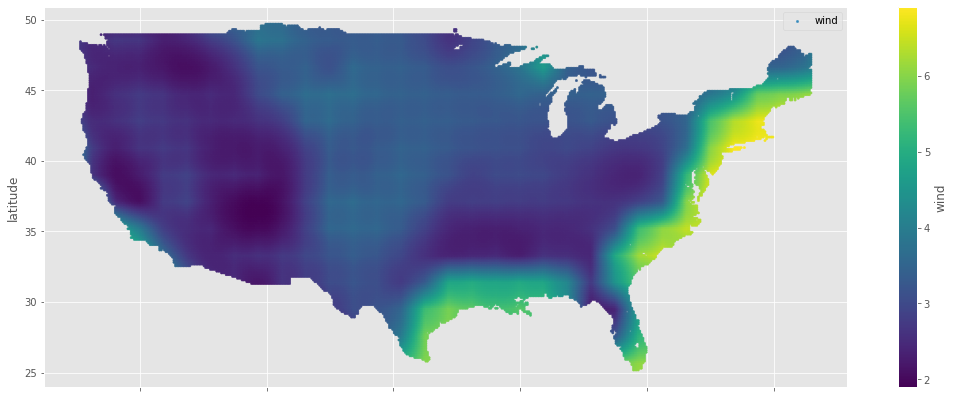

In [51]:
df_loction_avg.plot(kind="scatter", x='longitude', y='latitude',
    s= 5, label="wind",
    c="wind", cmap=plt.get_cmap("viridis"),
    colorbar=True, alpha=1, figsize=(18,7),
)
plt.legend()
plt.show()

### 2. Is North America warming up in a statistically meaningful way? Using the monthly data to show if there is evidence of increasing temperatures? Show a summary for:

**(i) A small set of randomly chosen measurement locations (max 10 or so)?** <br/>
**(ii) What about individual regions?**<br/>
**(iii) Nationally?**

In [52]:
fig = sm.qqplot(a, stats.t, fit=True, line='45')
plt.show()

NameError: name 'a' is not defined

In [53]:
# define get_df_name(df) to get the name of the dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# define a ttest function
def ttest_func(location, min_or_max, series, temp=0):
    tset, pval = ttest_1samp(series, temp)
    print(location,'1949-2010 Average', min_or_max,'Temp')
    print('mean:',series.mean())
    print("p-values:",pval)
    if pval < 0.05:    # alpha value is 0.05 or 5%
        print("we are rejecting null hypothesis")
    else:
        print("we are accepting null hypothesis")

In [54]:
# create diff_maxtemp & diff_mintemp columns for each region
res = []
for region in regions:
    # sort date
    region = region.sort_values('date')
    # shift max_temp so every location will have the previous one
    region['pre_maxtemp'] = region.groupby(['latitude','longitude','month']).max_temp.shift(1)
    # create difference of max_temp
    region['diff_maxtemp'] = region['max_temp'] - region['pre_maxtemp']
    
    # shift min_temp so every location will have the previous one
    region['pre_mintemp'] = region.groupby(['latitude','longitude','month']).min_temp.shift(1)
    
    # create difference of min_temp
    region['diff_mintemp'] = region['min_temp'] - region['pre_mintemp']
    res.append(region)

# separate each region to a dataframe
for i in range(len(regions)):
    exec('{} = res[i]'.format(get_df_name(regions[i])+'2'))

2019-12-03 15:26:41,397 - MAIN - [numexpr.utils] [INFO] : Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2019-12-03 15:26:41,398 - MAIN - [numexpr.utils] [INFO] : NumExpr defaulting to 8 threads.


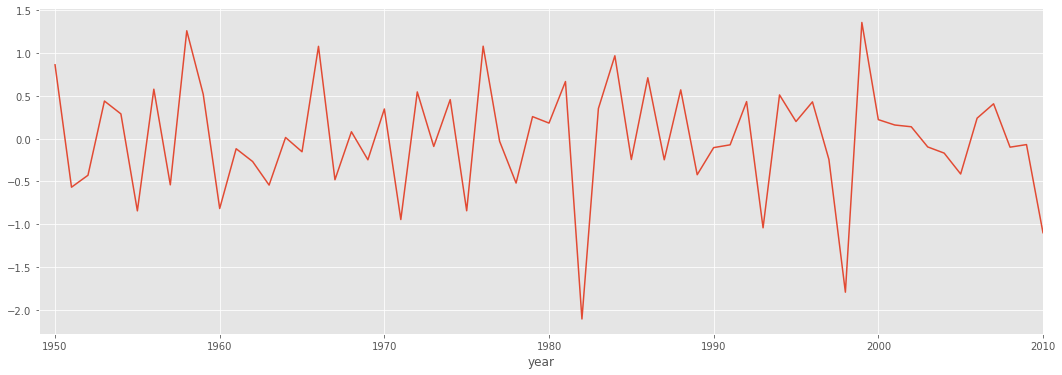

In [55]:
ax = plt.gca()

cali2.groupby('year')['diff_maxtemp'].mean().plot(kind='line',x='year',y='diff_maxtemp',ax=ax)
fig = plt.gcf()
fig.set_size_inches(18, 6)

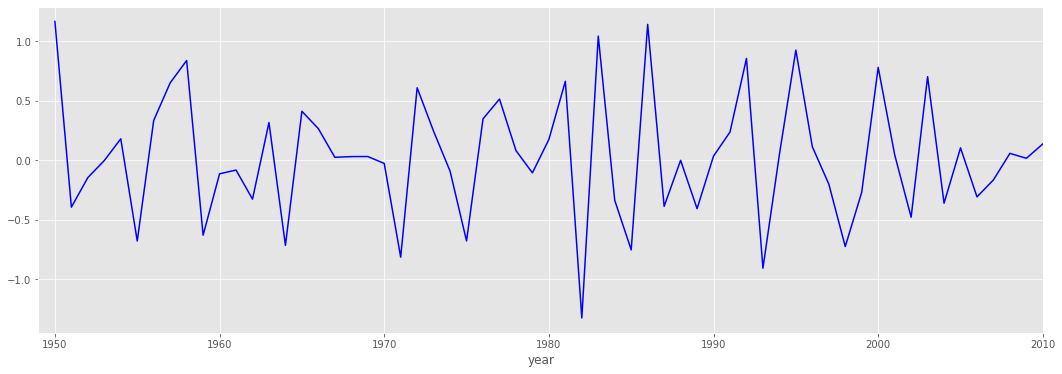

In [56]:
ax = plt.gca()

cali2.groupby('year')['diff_mintemp'].mean().plot(kind='line',x='year',y='diff_mintemp',ax=ax, color='b')
fig = plt.gcf()
fig.set_size_inches(18, 6)

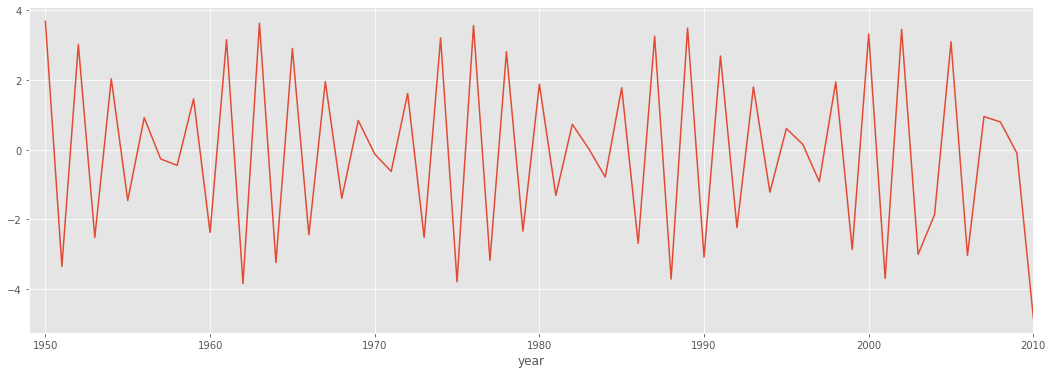

In [57]:
ax = plt.gca()

mex2.groupby('year')['diff_maxtemp'].mean().plot(kind='line',x='year',y='diff_maxtemp',ax=ax)
fig = plt.gcf()
fig.set_size_inches(18, 6)

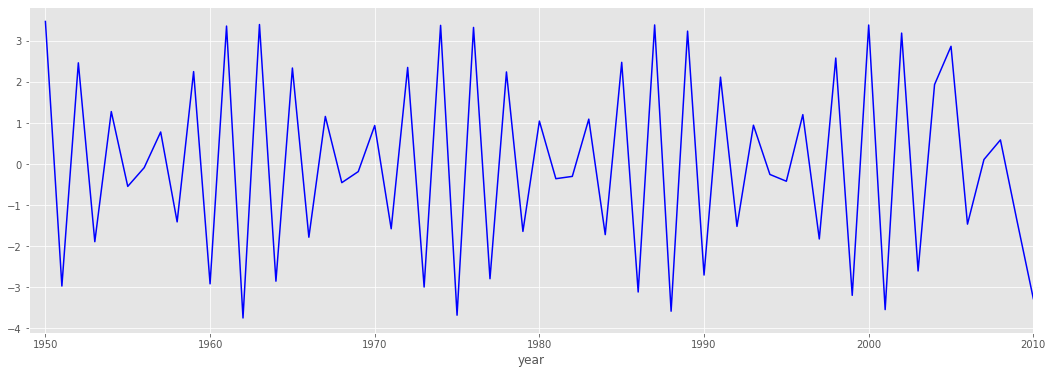

In [58]:
ax = plt.gca()

mex2.groupby('year')['diff_mintemp'].mean().plot(kind='line',x='year',y='diff_mintemp',ax=ax,color='b')
fig = plt.gcf()
fig.set_size_inches(18, 6)

**(i) A small set of randomly chosen measurement locations (max 10 or so)?** <br/>
We radomly selected 5 different measurement locations, and checked if the climate change (max_temp & min_temp) is statistically significant:

In [59]:
east_loc1_max = \
east2[(east2.latitude==25.1875)&(east2.longitude==-81.0625)].dropna().diff_maxtemp

ttest_func('East (25.1875, -81.0625)', 'Max', east_loc1_max)
print('')

east_loc1_min = \
east2[(east2.latitude==25.1875)&(east2.longitude==-81.0625)].dropna().diff_mintemp

ttest_func('East (25.1875, -81.0625)', 'Min', east_loc1_min)

East (25.1875, -81.0625) 1949-2010 Average Max Temp
mean: -0.018784153005464477
p-values: 0.7005705945241953
we are accepting null hypothesis

East (25.1875, -81.0625) 1949-2010 Average Min Temp
mean: -0.01610655737704918
p-values: 0.8199374386461349
we are accepting null hypothesis


In [60]:
ohio_loc1_max = \
ohio2[(ohio2.latitude==34.3125)&(ohio2.longitude==-88.0625)].dropna().diff_maxtemp

ttest_func('Ohio (34.3125, -88.0625)', 'Max', ohio_loc1_max)
print('')

ohio_loc1_min = \
ohio2[(ohio2.latitude==34.3125)&(ohio2.longitude==-88.0625)].dropna().diff_mintemp

ttest_func('Ohio (34.3125, -88.0625)', 'Max', ohio_loc1_min)

Ohio (34.3125, -88.0625) 1949-2010 Average Max Temp
mean: 0.003620218579234995
p-values: 0.9708435027203569
we are accepting null hypothesis

Ohio (34.3125, -88.0625) 1949-2010 Average Max Temp
mean: -0.04866120218579232
p-values: 0.6033708098883199
we are accepting null hypothesis


In [61]:
ohio_loc2_max = \
ohio2[(ohio2.latitude==42.4375)&(ohio2.longitude==-78.3125)].dropna().diff_maxtemp

ttest_func('Ohio (42.4375, -78.3125)', 'Max', ohio_loc2_max)
print('')

ohio_loc2_min = \
ohio2[(ohio2.latitude==42.4375)&(ohio2.longitude==-78.3125)].dropna().diff_mintemp

ttest_func('Ohio (42.4375, -78.3125)', 'Min', ohio_loc2_min)

Ohio (42.4375, -78.3125) 1949-2010 Average Max Temp
mean: -0.04420765027322408
p-values: 0.6752706137978881
we are accepting null hypothesis

Ohio (42.4375, -78.3125) 1949-2010 Average Min Temp
mean: 0.00023224043715852082
p-values: 0.99816775003325
we are accepting null hypothesis


In [62]:
grb_loc1_max = \
grb2[(grb2.latitude==35.6875)&(grb2.longitude==-115.9375)].dropna().diff_maxtemp

ttest_func('Great Basin (35.6875, -115.9375)', 'Max', grb_loc1_max)
print('')

grb_loc1_min = \
grb2[(grb2.latitude==35.6875)&(grb2.longitude==-115.9375)].dropna().diff_mintemp

ttest_func('Great Basin (35.6875, -115.9375)', 'Min', grb_loc1_min)

Great Basin (35.6875, -115.9375) 1949-2010 Average Max Temp
mean: 0.001393442622950841
p-values: 0.9890986995862798
we are accepting null hypothesis

Great Basin (35.6875, -115.9375) 1949-2010 Average Min Temp
mean: 0.026434426229508194
p-values: 0.738576154563243
we are accepting null hypothesis


In [63]:
ark_loc1_max = \
ark2[(ark2.latitude==31.4375)&(ark2.longitude==-93.3125)].dropna().diff_maxtemp

ttest_func('Arkansas-Red (31.4375, -93.3125)', 'Max', ark_loc1_max)
print('')

ark_loc1_min = \
ark2[(ark2.latitude==31.4375)&(ark2.longitude==-93.3125)].dropna().diff_mintemp

ttest_func('Arkansas-Red (31.4375, -93.3125)', 'Min', ark_loc1_min)

Arkansas-Red (31.4375, -93.3125) 1949-2010 Average Max Temp
mean: -0.004685792349726749
p-values: 0.9569045133608658
we are accepting null hypothesis

Arkansas-Red (31.4375, -93.3125) 1949-2010 Average Min Temp
mean: -0.009316939890710372
p-values: 0.9169148353048121
we are accepting null hypothesis


**(ii) What about individual regions?**

In [64]:
regions2 = \
[crb2, cali2, grb2, color2, rio2, mo2, ark2, gulf2, glakes2, up2, low2, ohio2, east2, mex2]

for r in regions2:
    exec('{} = r.dropna().diff_maxtemp'.format(get_df_name(r)+'_max'))
    exec('{} = r.dropna().diff_mintemp'.format(get_df_name(r)+'_min'))
    exec("ttest_func(get_df_name(r), 'Max', {})".format(get_df_name(r)+'_max'))
    print('')
    exec("ttest_func(get_df_name(r), 'Min', {})".format(get_df_name(r)+'_min'))
    print('')

crb2 1949-2010 Average Max Temp
mean: -0.0061548392970383866
p-values: 1.8541799731608106e-05
we are rejecting null hypothesis

crb2 1949-2010 Average Min Temp
mean: 0.030867758962568846
p-values: 1.89078297507719e-138
we are rejecting null hypothesis

cali2 1949-2010 Average Max Temp
mean: -0.00484750318730037
p-values: 0.01070634384458335
we are rejecting null hypothesis

cali2 1949-2010 Average Min Temp
mean: 0.02718358286416745
p-values: 1.5387861321308836e-83
we are rejecting null hypothesis

grb2 1949-2010 Average Max Temp
mean: -0.0005415863066545234
p-values: 0.8058613203417827
we are accepting null hypothesis

grb2 1949-2010 Average Min Temp
mean: 0.027815890188039878
p-values: 1.617681314724549e-53
we are rejecting null hypothesis

color2 1949-2010 Average Max Temp
mean: 0.003776983746857574
p-values: 0.012948046423857953
we are rejecting null hypothesis

color2 1949-2010 Average Min Temp
mean: 0.025504720643836555
p-values: 1.6903505326555653e-93
we are rejecting null hypoth

**(iii) Nationally?**

In [65]:
# create national level diff_maxtemp series and diff_mintemp series

exec('national_diffmax = {}'.format(get_df_name(regions2[0])+'_max'))
exec('national_diffmin = {}'.format(get_df_name(regions2[0])+'_min'))
for i in range(1,len(regions2)):
    exec('national_diffmax = national_diffmax.append({})'.format(get_df_name(regions2[i])+'_max'))
    exec('national_diffmin = national_diffmin.append({})'.format(get_df_name(regions2[i])+'_min'))

In [66]:
ttest_func('National', 'Max', national_diffmax)
print('')
ttest_func('National', 'Min', national_diffmin)

National 1949-2010 Average Max Temp
mean: -0.01206172900562545
p-values: 4.242015837240787e-75
we are rejecting null hypothesis

National 1949-2010 Average Min Temp
mean: 0.008698430880875532
p-values: 1.4141285894627286e-49
we are rejecting null hypothesis


### 3. Are Other Effects meaningful in assessing temperature trends? Do other factors impact the analysis? Find open datasets and combine them with this data to produce more insights:

**(i) What about topography/elevation?** <br/>
**(ii) Proximity to the coast, rivers or lakes?**<br/>
**(iii) Level of aridity / precipitation?**<br/>
**(iv) Urban vs. rural setting?**<br/>
**(v) Surprise us. What other insight can you produce?**

In [ ]:
# population change vs. temp change

In [ ]:
c = pd.read_csv("Cities by Population.csv")

#### Process

text = open("Cities by Population.csv",'r').readlines()
dic_col = ['City', 'Rank', 'State', 'Growth From 2000 to 2013', 'Population', 'Coordinates']
city = pd.DataFrame(columns = ['City', 'Rank', 'State', 'Growth From 2000 to 2013', 'Population', 'Coordinates'])

for line in text:
    row = line.split(";")
    record = {"%s" %x: "%s" %y for x, y in zip(dic_col, row)}
    record = pd.DataFrame(record, index = [0])
    city = pd.concat([city, record])

city = city.reset_index(drop = True) # set_index to iterable integers

city = city.iloc[1:].reset_index(drop = True) # drop first row (column names)

city.Coordinates = city.Coordinates.apply(lambda x: x.split()[0]) # drop /n

# specific latitude and longitude
city["Latitude"] = city.Coordinates.apply(lambda x: x.split(",")[0])
city["Longitude"] = city.Coordinates.apply(lambda x: x.split(",")[1]) 

#__Column Type__

#city.columns

In [ ]:
city.columns = city.columns.str.lower().str.replace(" ","_")

In [ ]:
city[city.state == 'California']

---

### National Tempture Change per Month

In [71]:
df_nation_month_avg = query('''select date,
            avg(min_temp) as min_temp, avg(max_temp) as max_temp, 
            avg(precipitation) as precipitation, avg(wind) as wind
            from student_weather group by date;
            ''')

In [72]:
df_nation_month_avg['date'] = pd.to_datetime(df_nation_month_avg['date'])
df_nation_month_avg['year'] = df_nation_month_avg['date'].dt.year
df_nation_month_avg['month'] = df_nation_month_avg['date'].dt.month

In [74]:
df_nation_month_avg['pre_mintemp'] = df_nation_month_avg.groupby(['month']).min_temp.shift(1)
df_nation_month_avg['pre_maxtemp'] = df_nation_month_avg.groupby(['month']).max_temp.shift(1)

In [76]:
df_nation_month_avg['diff_maxtemp'] = df_nation_month_avg['max_temp'] - df_nation_month_avg['pre_maxtemp']
df_nation_month_avg['diff_mintemp'] = df_nation_month_avg['min_temp'] - df_nation_month_avg['pre_mintemp']

In [80]:
df_nation_month_diff = df_nation_month_avg[['date','year','diff_mintemp','diff_maxtemp']].iloc[12:]

In [85]:
df_nation_year_diff = df_nation_month_diff.groupby('year')['diff_mintemp','diff_maxtemp'].mean().reset_index()

In [86]:
df_nation_year_diff

year  diff_mintemp  diff_maxtemp
0   1950     -0.062356     -0.044894
1   1951     -0.308177     -0.491814
2   1952      0.614941      1.086156
3   1953      0.427745      0.344489
4   1954      0.025464      0.130794
..   ...           ...           ...
56  2006      0.079792      0.234470
57  2007     -0.264113     -0.319680
58  2008     -0.739999     -0.596102
59  2009      0.127323     -0.173050
60  2010      0.189048     -0.126050

[61 rows x 3 columns]

In [99]:
y = df_nation_year_diff[(df_nation_year_diff.year >= 1969) & (df_nation_year_diff.year <= 2010)].reset_index()

In [100]:
y

index  year  diff_mintemp  diff_maxtemp
0      19  1969      0.150594      0.036868
1      20  1970      0.006155      0.154221
2      21  1971     -0.086277     -0.073381
3      22  1972      0.093798     -0.126424
4      23  1973      0.354693      0.222245
5      24  1974     -0.044885      0.483212
6      25  1975     -0.534922     -0.890789
7      26  1976     -0.159254      0.760550
8      27  1977      0.587891     -0.037386
9      28  1978     -0.462850     -0.714511
10     29  1979     -0.249262     -0.198880
11     30  1980      0.715751      1.012846
12     31  1981      0.428329      0.246671
13     32  1982     -0.793681     -1.169425
14     33  1983      0.572389      0.177759
15     34  1984     -0.329877      0.152406
16     35  1985     -0.263028     -0.169877
17     36  1986      0.925326      0.712690
18     37  1987      0.081749      0.519620
19     38  1988     -0.954443     -0.416821
20     39  1989      0.013815     -0.407231
21     40  1990      0.707475      0.603776
22     41  1991      0.222241     -0.227888
23     42  1992     -0.359476     -0.523557
24     43  1993     -0.571704     -0.668422
25     44  1994      0.560488      1.026229
26     45  1995      0.012764     -0.200215
27     46  1996     -0.412122     -0.377718
28     47  1997      0.201607     -0.026627
29     48  1998      1.305741      1.134682
30     49  1999     -0.944448      0.037228
31     50  2000      0.071122     -0.238389
32     51  2001     -0.030655     -0.127584
33     52  2002      0.016348      0.010842
34     53  2003     -0.080065     -0.256799
35     54  2004      0.199304     -0.449255
36     55  2005      0.334044      0.631235
37     56  2006      0.079792      0.234470
38     57  2007     -0.264113     -0.319680
39     58  2008     -0.739999     -0.596102
40     59  2009      0.127323     -0.173050
41     60  2010      0.189048     -0.126050

### US Population 1969 - 2017

In [89]:
df_popu_year = pd.read_csv('population.csv')

In [90]:
population = df_popu_year.groupby('year').Population.sum().to_frame().reset_index()

In [96]:
x_p = population[(population.year >= 1969) & (population.year <= 2010) ]

In [93]:
x_p

year  Population
0   1969   201174393
1   1970   204000665
2   1971   206828966
3   1972   209286088
4   1973   211360233
5   1974   213343943
6   1975   215467514
7   1976   217564624
8   1977   219762255
9   1978   222097449
10  1979   224570142
11  1980   227225826
12  1981   229466391
13  1982   231665106
14  1983   233792697
15  1984   235825544
16  1985   237924311
17  1986   240133472
18  1987   242289738
19  1988   244499776
20  1989   246819839
21  1990   249622814
22  1991   252980941
23  1992   256514224
24  1993   259918588
25  1994   263125821
26  1995   266278393
27  1996   269394284
28  1997   272646925
29  1998   275854104
30  1999   279040168
31  2000   282162411
32  2001   284968955
33  2002   287625193
34  2003   290107933
35  2004   292805298
36  2005   295516599
37  2006   298379912
38  2007   301231207
39  2008   304093966
40  2009   306771529
41  2010   309338421

### US Emission

In [103]:
df_emission = pd.read_csv('US_GreenHouseEmission.csv')

In [104]:
df_emission = df_emission.iloc[:,1:3]

In [105]:
df_emission.columns = ['year', 'emmission']

In [108]:
x_e = df_emission[(df_emission.year >= 1969) & (df_emission.year <= 2010) ].reset_index()

In [109]:
x_e

index  year  emmission
0     169  1969    1097559
1     170  1970    1180503
2     171  1971    1188102
3     172  1972    1244874
4     173  1973    1300844
5     174  1974    1254019
6     175  1975    1201617
7     176  1976    1258004
8     177  1977    1293235
9     178  1978    1333750
10    179  1979    1336732
11    180  1980    1288031
12    181  1981    1236924
13    182  1982    1174461
14    183  1983    1184041
15    184  1984    1220396
16    185  1985    1225131
17    186  1986    1225924
18    187  1987    1278531
19    188  1988    1334204
20    189  1989    1351263
21    190  1990    1315354
22    191  1991    1314657
23    192  1992    1338842
24    193  1993    1371332
25    194  1994    1389243
26    195  1995    1399760
27    196  1996    1432264
28    197  1997    1464062
29    198  1998    1472869
30    199  1999    1501137
31    200  2000    1552682
32    201  2001    1525987
33    202  2002    1538399
34    203  2003    1547778
35    204  2004    1569696
36    205  2005    1578873
37    206  2006    1553664
38    207  2007    1578683
39    208  2008    1530982
40    209  2009    1435371
41    210  2010    1471375

In [231]:
aa = pd.DataFrame({'population':x_p.Population, 'emission':x_e.emmission,'min_temp':y.diff_mintemp,'max_temp':y.diff_maxtemp})

In [232]:
aa.corr()

population  emission  min_temp  max_temp
population    1.000000  0.903040 -0.029242 -0.081217
emission      0.903040  1.000000 -0.036965 -0.047190
min_temp     -0.029242 -0.036965  1.000000  0.729068
max_temp     -0.081217 -0.047190  0.729068  1.000000

In [233]:
import seaborn as sns

In [234]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    #colormap = sns.diverging_palette(220, 10, as_cmap=True)
    colormap = 'viridis'
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

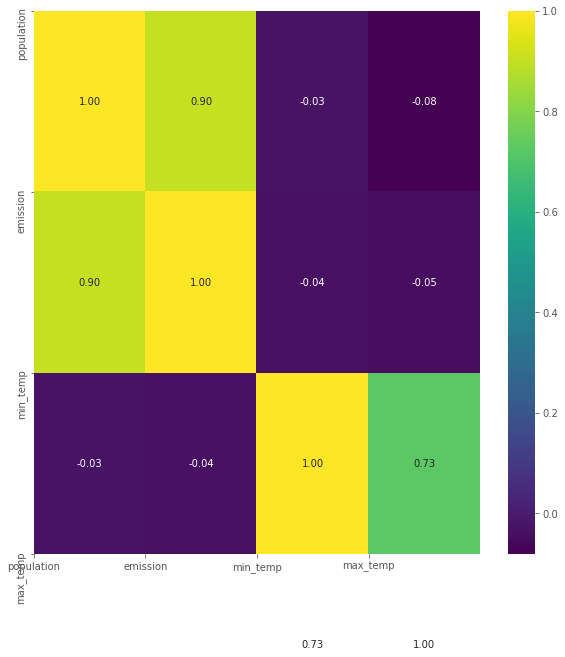

In [235]:
heatMap(aa)

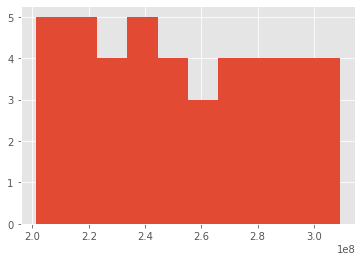

In [202]:
x_p.Population.hist(bins=10)

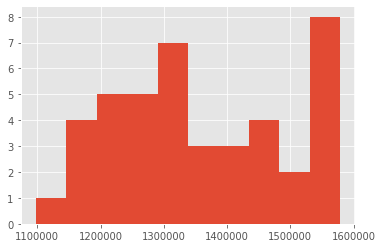

In [204]:
x_e.emmission.hist(bins=10)

In [209]:
Y = y.diff_mintemp
X = x_p.Population

In [210]:
X_prime = sm.add_constant(X)
reg = sm.OLS(Y, X_prime)
ols = reg.fit()
ols.summary()

/Users/xyang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           diff_mintemp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.03423
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.854
Time:                        22:33:20   Log-Likelihood:                -28.719
No. Observations:                  42   AIC:                             61.44
Df Residuals:                      40   BIC:                             64.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1256      0.596      0.211      0.834      -1.080       1.331
Population -4.332e-10   2.34e-09     -0.185      0.854   -5.17e-09     4.3e-09
==============================================================================
Omnibus:                        0.829   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.284
Skew:                           0.172   Prob(JB):                        0.867
Kurtosis:                       3.210   Cond. No.                     2.00e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS: Tempture_Diff ~ Population + Emission

In [112]:
Y = y.diff_mintemp
X = np.column_stack((x_p.Population, x_e.emmission))

In [113]:
X_prime = sm.add_constant(X)
reg = sm.OLS(Y, X_prime)
ols = reg.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           diff_mintemp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                   0.02850
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.972
Time:                        15:55:50   Log-Likelihood:                -28.706
No. Observations:                  42   AIC:                             63.41
Df Residuals:                      39   BIC:                             68.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.814      0.257      0.798      -1.437       1.855
x1          3.323e-10   5.52e-09      0.060      0.952   -1.08e-08    1.15e-08
x2         -2.039e-07   1.33e-06     -0.154      0.879   -2.89e-06    2.48e-06
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   2.437
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.270
Skew:                           0.162   Prob(JB):                        0.874
Kurtosis:                       3.220   Cond. No.                     2.70e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
Y = y.diff_maxtemp
X = np.column_stack((x_p.Population, x_e.emmission))

In [115]:
X_prime = sm.add_constant(X)
reg = sm.OLS(Y, X_prime)
ols = reg.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           diff_maxtemp   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2030
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.817
Time:                        15:56:53   Log-Likelihood:                -30.985
No. Observations:                  42   AIC:                             67.97
Df Residuals:                      39   BIC:                             73.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0938      0.859      0.109      0.914      -1.644       1.832
x1         -3.287e-09   5.83e-09     -0.564      0.576   -1.51e-08     8.5e-09
x2          5.357e-07    1.4e-06      0.382      0.704    -2.3e-06    3.37e-06
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.651
Skew:                           0.304   Prob(JB):                        0.722
Kurtosis:                       2.962   Cond. No.                     2.70e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
from sklearn import preprocessing

In [216]:
norm = preprocessing.normalize([y.diff_maxtemp,x_p.Population, x_e.emmission])

In [217]:
norm

array([[ 0.01118306,  0.04677887, -0.02225825, -0.03834753,  0.06741216,
         0.14656955, -0.27019727,  0.2306928 , -0.01134009, -0.2167282 ,
        -0.06032497,  0.30722002,  0.07482128, -0.35471423,  0.05391852,
         0.04622836, -0.05152757,  0.21617565,  0.15761295, -0.12643156,
        -0.12352281,  0.1831396 , -0.06912387, -0.15880726, -0.2027483 ,
         0.31127941, -0.06072992, -0.11457077, -0.00807674,  0.34417583,
         0.01129226, -0.07230895, -0.03869911,  0.00328877, -0.07789317,
        -0.13626976,  0.19146856,  0.0711202 , -0.09696652, -0.18081187,
        -0.05249028, -0.03823383],
       [ 0.12184396,  0.12355573,  0.12526873,  0.12675692,  0.12801315,
         0.12921461,  0.13050078,  0.13177092,  0.13310195,  0.13451629,
         0.13601391,  0.13762236,  0.13897939,  0.14031107,  0.14159967,
         0.14283089,  0.14410204,  0.14544005,  0.14674602,  0.14808456,
         0.14948974,  0.15118739,  0.15322129,  0.15536127,  0.15742317,
         0.15936

In [126]:
Y = norm[0]
X = np.column_stack((norm[1], norm[2]))

In [127]:
X_prime = sm.add_constant(X)
reg = sm.OLS(Y, X_prime)
ols = reg.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2030
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.817
Time:                        16:06:03   Log-Likelihood:                 19.119
No. Observations:                  42   AIC:                            -32.24
Df Residuals:                      39   BIC:                            -27.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.261      0.109      0.914      -0.499       0.556
x1            -1.6460      2.918     -0.564      0.576      -7.548       4.256
x2             1.4384      3.764      0.382      0.704      -6.175       9.051
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.651
Skew:                           0.304   Prob(JB):                        0.722
Kurtosis:                       2.962   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
x_p_n =(x_p.Population-min(x_p.Population))/(max(x_p.Population)-min(x_p.Population))

In [220]:
x_e_n =(x_e.emmission-min(x_e.emmission))/(max(x_e.emmission)-min(x_e.emmission))

In [223]:
y_n =(y.diff_maxtemp-min(y.diff_maxtemp))/(max(y.diff_maxtemp)-min(y.diff_maxtemp))

In [224]:
Y = y_n
X = np.column_stack((x_p_n, x_e_n))

In [225]:
X_prime = sm.add_constant(X)
reg = sm.OLS(Y, X_prime)
ols = reg.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           diff_maxtemp   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2030
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.817
Time:                        22:42:25   Log-Likelihood:                 4.0720
No. Observations:                  42   AIC:                            -2.144
Df Residuals:                      39   BIC:                             3.069
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5165      0.078      6.614      0.000       0.359       0.674
x1            -0.1543      0.273     -0.564      0.576      -0.707       0.399
x2             0.1119      0.293      0.382      0.704      -0.480       0.704
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.651
Skew:                           0.304   Prob(JB):                        0.722
Kurtosis:                       2.962   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. What about volatility? Are meteorological effects becoming more volatile? Support your conclusions.

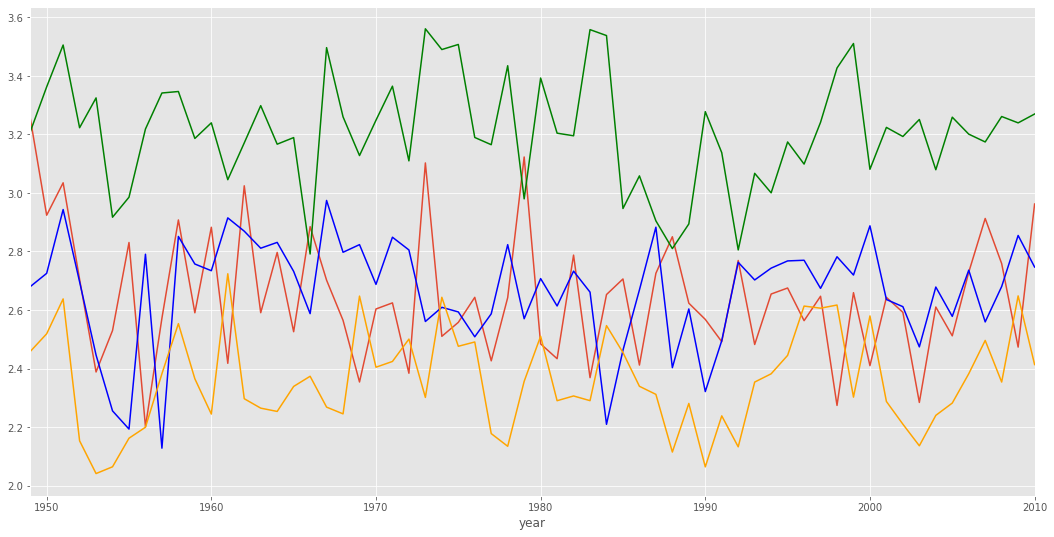

In [133]:
# Checking Mex wind and precipitation data to see if we need to exclude it
# Mex avg wind by month
fig = plt.gcf()
fig.set_size_inches(18, 9)
ax = plt.gca()

mex[mex.month==1].groupby('year')['wind'].mean().plot(kind='line',x='year',y='wind',ax=ax,label='Jan')
mex[mex.month==4].groupby('year')['wind'].mean().plot(kind='line',x='year',y='wind',\
                                                            ax=ax,color='green',label='Apr')
mex[mex.month==7].groupby('year')['wind'].mean().plot(kind='line',x='year',y='wind',\
                                                            ax=ax, color='blue', label='Jul')
mex[mex.month==10].groupby('year')['wind'].mean().plot(kind='line',x='year',y='wind',\
                                                             ax=ax, color='orange', label='Sep')



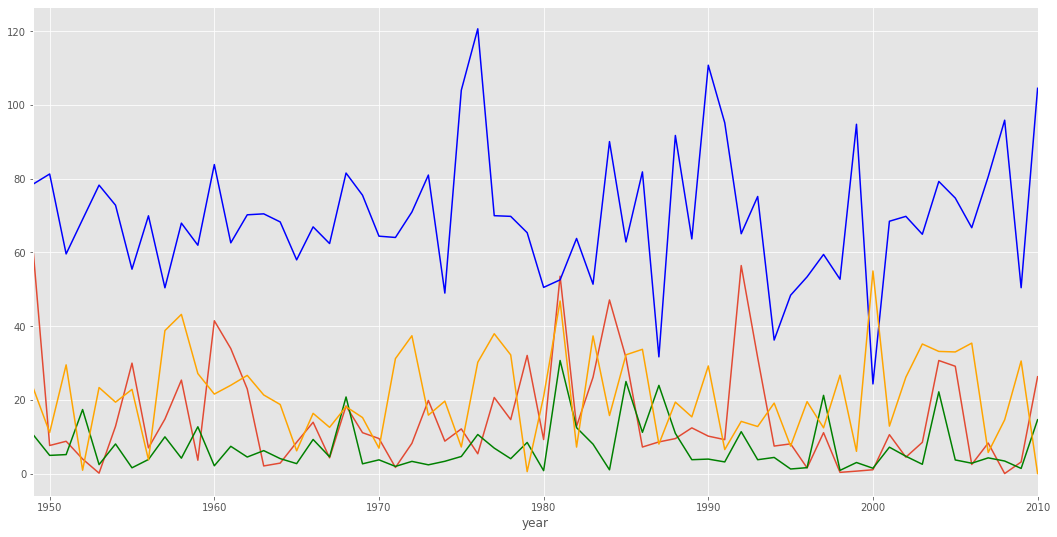

In [134]:
# Mex avg precipitation by month
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18, 9)
mex[mex.month==1].groupby('year')['precipitation'].mean().plot(kind='line',x='year',y='precipitation',ax=ax,label='Jan')
mex[mex.month==4].groupby('year')['precipitation'].mean().plot(kind='line',x='year',y='precipitation',\
                                                            ax=ax,color='green',label='Apr')
mex[mex.month==7].groupby('year')['precipitation'].mean().plot(kind='line',x='year',y='precipitation',\
                                                            ax=ax, color='blue', label='Jul')
mex[mex.month==10].groupby('year')['precipitation'].mean().plot(kind='line',x='year',y='precipitation',\
                                                             ax=ax, color='orange', label='Sep')



In [140]:
conn = get_conn()
df_nation_month_avg = pd.read_sql_query('''select date,
                      avg(precipitation) as precipitation, stddev(precipitation) as std_precipitation,
                      avg(wind) as wind, stddev(wind) as std_wind
                      from student_weather 
                      group by date;
                      ''', conn)

In [141]:
df_nation_month_avg2 = df_nation_month_avg.copy()
df_nation_month_avg2['precipitation_pctchange'] = df_nation_month_avg2.precipitation.pct_change()
df_nation_month_avg2['wind_pctchange'] = df_nation_month_avg2.wind.pct_change()

National Monthly Avg Precipitation: 744 data points


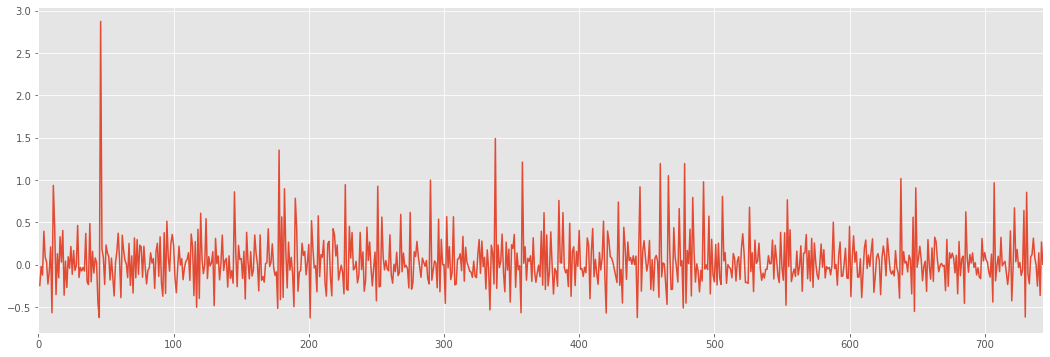

In [142]:
print('National Monthly Avg Precipitation:',len(df_nation_month_avg2), 'data points')
df_nation_month_avg2['precipitation_pctchange'].plot()
fig = plt.gcf()
fig.set_size_inches(18, 6)

The ARCH effect is visible from inspecting the percentage change of the precipitation series. Notice that the Variance changes over time: some periods exhibit small variance while others show increased variance.

National Monthly Avg Wind: 744 data points


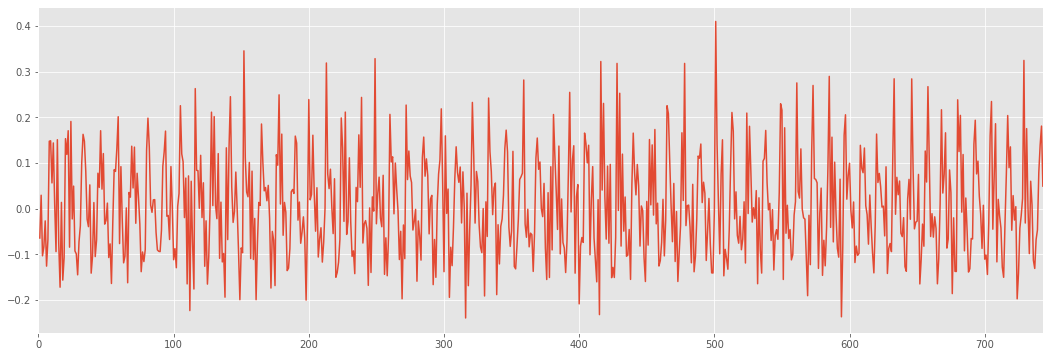

In [143]:
print('National Monthly Avg Wind:',len(df_nation_month_avg2), 'data points')
df_nation_month_avg2['wind_pctchange'].plot()
fig = plt.gcf()
fig.set_size_inches(18, 6)

In [144]:
df_nation_month_avgtemp = pd.read_sql_query('''select date,
                          avg(max_temp) as avg_maxtemp, avg(min_temp) as avg_mintemp
                          from student_weather 
                          where region!='mex'
                          group by date;
                          ''', conn)

In [145]:
df_nation_month_avgtemp['diff_maxtemp'] = df_nation_month_avgtemp.avg_maxtemp.diff()
df_nation_month_avgtemp['diff_mintemp'] = df_nation_month_avgtemp.avg_mintemp.diff()

In [146]:
train, test = train_test_split(df_nation_month_avgtemp[1:], test_size=0.2, shuffle=False)

**Max Temp**

In [147]:
np.mean(train['diff_maxtemp']),np.mean(test['diff_maxtemp'])

(0.048753848945913635, -0.17658034804154232)

In [148]:
train['max_var'] = (train['diff_maxtemp'] - np.mean(train['diff_maxtemp']) ) ** 2
train['max_u'] = train['diff_maxtemp'] - np.mean(train['diff_maxtemp']) 
train.head(5)

date  avg_maxtemp  avg_mintemp  diff_maxtemp  diff_mintemp  \
1  1949-02-01     5.731568    -7.194228      3.819665      2.629517   
2  1949-03-01    10.951924    -1.957698      5.220356      5.236531   
3  1949-04-01    18.553907     3.283863      7.601983      5.241561   
4  1949-05-01    23.589627     8.632082      5.035720      5.348219   
5  1949-06-01    27.687084    12.809683      4.097457      4.177600   

     max_var     max_u  
1  14.219769  3.770911  
2  26.745467  5.171602  
3  57.051267  7.553229  
4  24.869834  4.986966  
5  16.391998  4.048703

ADF Statistic: -5.746528
p-value: 0.000001
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569

We reject the Null Hypothesis (H0) -- the time series is stationary


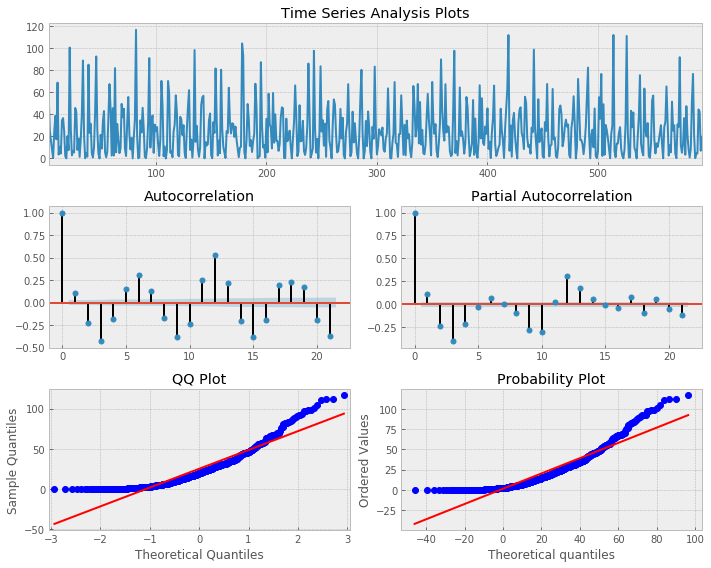

In [149]:
testing.ts_plot(train['max_var'][2:],lags=21)

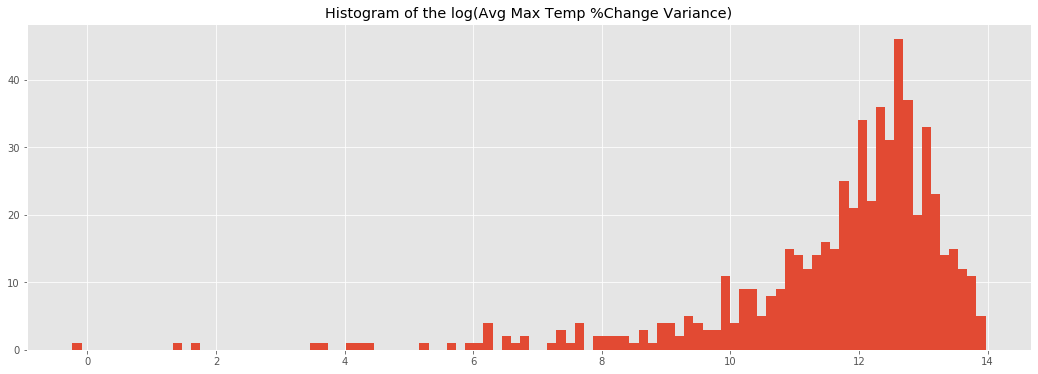

In [153]:
# let's inspect the distribution of the variance
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.hist(np.log(train['max_var']*10000), bins=100)
plt.title('Histogram of the log(Avg Max Temp %Change Variance)')
plt.show()

In [151]:
lb, p_values=statsmodels.stats.diagnostic.acorr_ljungbox(train['max_var'][2:], lags=20)

array([8.23373778e-003, 9.64507392e-009, 1.27924161e-031, 3.85403623e-035,
       4.77805637e-037, 3.29686231e-048, 2.31983896e-049, 3.02084726e-052,
       3.12088139e-070, 8.92904342e-077, 3.35682398e-084, 4.60187019e-120,
       3.54910947e-125, 1.40675332e-129, 7.31607802e-148, 5.06781745e-152,
       3.38798060e-156, 6.80761408e-162, 3.49429243e-165, 1.49788177e-169])

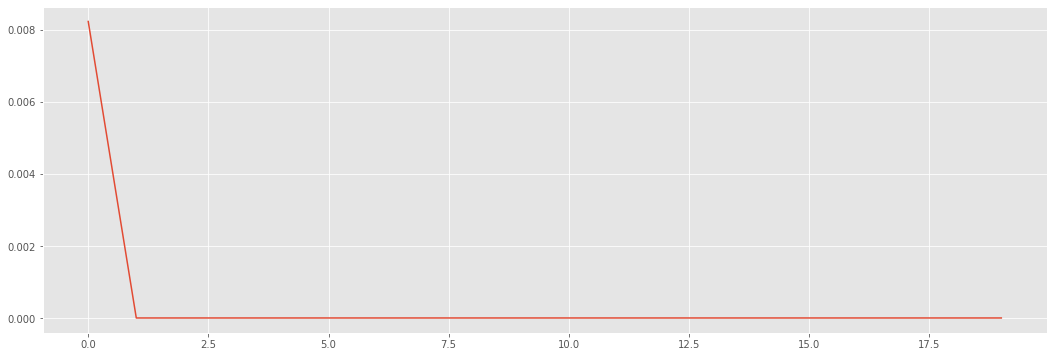

In [154]:
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.plot(p_values)
p_values

The low p-values of the Ljung-Box test suggest there is serial auto-correlation within the residuals of the series.

**Min Temp**

### 5. Produce forecasts of *temperature* and *volatility* from 2010 to 2020. Split your existing data into a training and evaluation set, compare in and out of sample behavior for at least *3 different methodologies*.

### Forecast Temperature

In [155]:
df_nation_month_avgtemp

date  avg_maxtemp  avg_mintemp  diff_maxtemp  diff_mintemp
0    1949-01-01     1.911903    -9.823745           NaN           NaN
1    1949-02-01     5.731568    -7.194228      3.819665      2.629517
2    1949-03-01    10.951924    -1.957698      5.220356      5.236531
3    1949-04-01    18.553907     3.283863      7.601983      5.241561
4    1949-05-01    23.589627     8.632082      5.035720      5.348219
..          ...          ...          ...           ...           ...
739  2010-08-01    30.097996    15.347965     -0.063730     -0.662839
740  2010-09-01    26.016233    10.624066     -4.081764     -4.723899
741  2010-10-01    20.324216     4.992556     -5.692016     -5.631511
742  2010-11-01    11.343113    -1.767440     -8.981104     -6.759995
743  2010-12-01     4.561218    -6.288489     -6.781895     -4.521049

[744 rows x 5 columns]

In [156]:
national_max = df_nation_month_avgtemp[['date','avg_maxtemp']]
national_max = national_max.set_index('date')

National Monthly Avg Max Temp: 744 data points


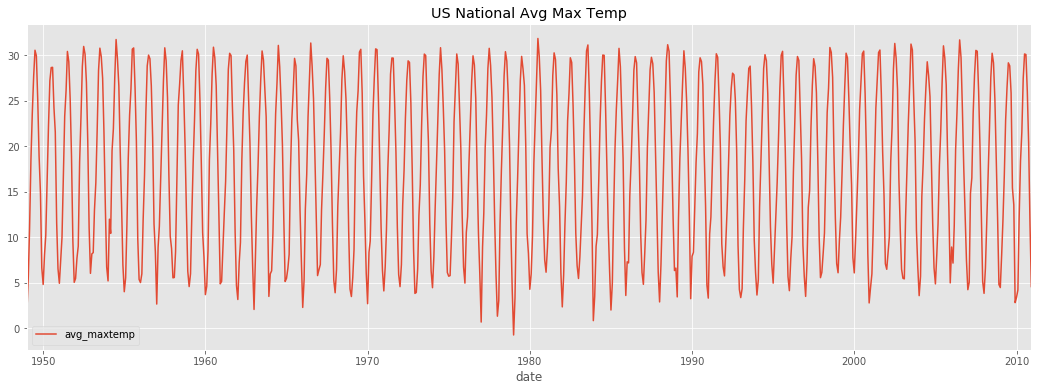

In [157]:
print('National Monthly Avg Max Temp:',len(national_max), 'data points')
national_max.plot()
plt.title('US National Avg Max Temp')
fig = plt.gcf()
fig.set_size_inches(18, 6)

ADF Statistic: -6.348460
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569

We reject the Null Hypothesis (H0) -- the time series is stationary


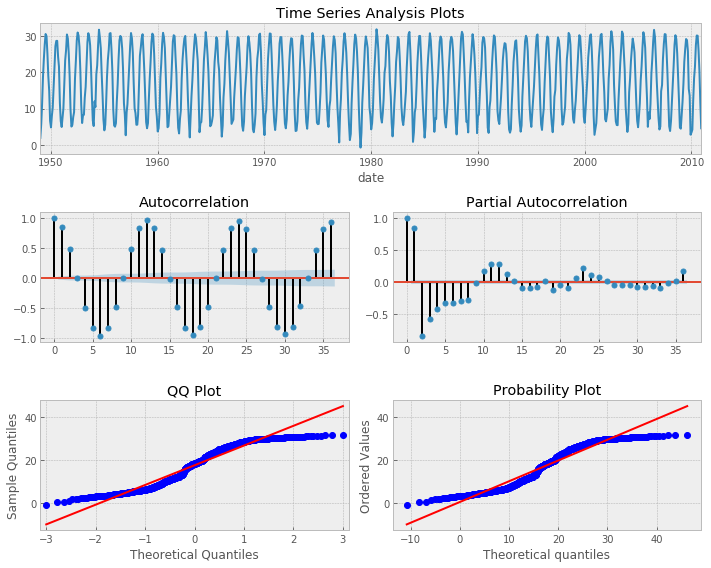

In [158]:
# Test stationarity
testing.ts_plot(national_max['avg_maxtemp'], lags=36)

The test shows that the data is stationary.

In [159]:
# split train, test data
train, test = train_test_split(df_nation_month_avgtemp, test_size=.2, shuffle=False)

Identify the order (p) of the process:

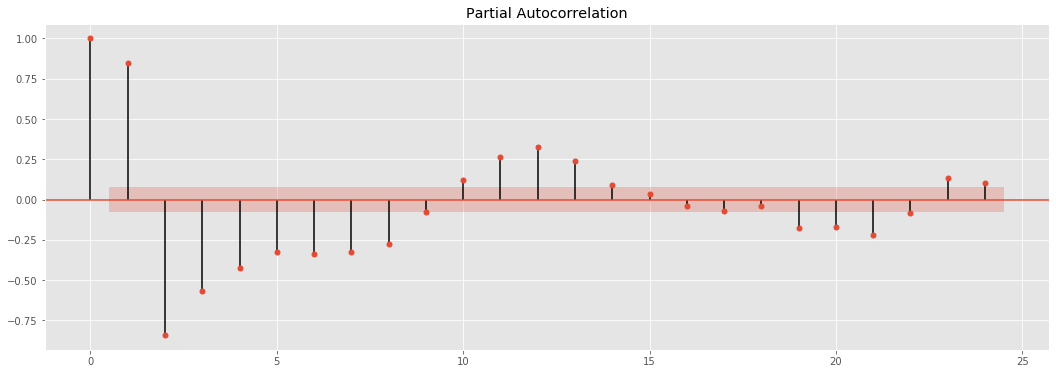

In [160]:
R = train['avg_maxtemp']
plot_pacf(R,lags=24)
pacf(R)
fig = plt.gcf()
fig.set_size_inches(18, 6)

#### a) AR(12) Model

In [161]:
model = ARIMA(train['avg_maxtemp'], order=(12,0,0))
f = model.fit()
forecast, std_error, conf = f.forecast(149)
forecast, std_error, conf

(array([29.52259032, 24.96467314, 18.03829311, 11.04494173,  6.59580764,
         5.51695913,  7.38283321, 11.17086688, 17.00801488, 23.09983856,
        27.60395516, 30.37925057, 29.21855785, 24.61086793, 17.99161764,
        11.44805997,  6.93470299,  5.44471045,  7.07912939, 11.18803052,
        16.99775432, 23.10810507, 27.90963168, 30.20547181, 28.94478374,
        24.4301082 , 18.03409804, 11.67023104,  7.11453656,  5.45251011,
         6.9557464 , 11.14008815, 17.02611934, 23.17908404, 27.98141278,
        30.08723853, 28.75826878, 24.32448253, 18.0785125 , 11.81343892,
         7.23325563,  5.47629725,  6.90880117, 11.11808354, 17.05693937,
        23.22334984, 27.97813251, 29.98693824, 28.6276876 , 24.25744926,
        18.11407899, 11.91257406,  7.32039624,  5.50928934,  6.90318485,
        11.12051468, 17.08108454, 23.23864248, 27.94534435, 29.89782445,
        28.52988947, 24.21077521, 18.14076479, 11.98499136,  7.39057867,
         5.55023055,  6.92173323, 11.13714532, 17.0

In [162]:
print(f.summary())

                              ARMA Model Results                              
Dep. Variable:            avg_maxtemp   No. Observations:                  595
Model:                    ARMA(12, 0)   Log Likelihood               -1051.904
Method:                       css-mle   S.D. of innovations              1.405
Date:                Tue, 03 Dec 2019   AIC                           2131.807
Time:                        16:11:47   BIC                           2193.247
Sample:                             0   HQIC                          2155.734
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.6617      0.092    191.296      0.000      17.481      17.843
ar.L1.avg_maxtemp      0.3319      0.039      8.492      0.000       0.255       0.409
ar.L2.avg_maxtemp   

In [163]:
print('train: ',len(train))
print('test : ',len(test))

train:  595
test :  149


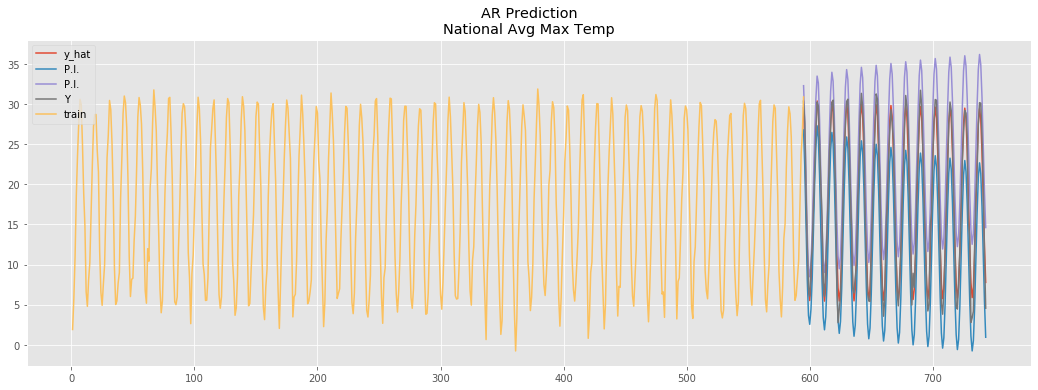

In [164]:
plt.plot(np.arange(595,744,1),forecast, label='y_hat')
plt.plot(np.arange(595,744,1),conf, label='P.I.')
plt.plot(np.arange(595,744,1),test.avg_maxtemp.values, label='Y')
plt.plot(np.arange(1,596,1), train.avg_maxtemp.values, label='train')
plt.legend()
plt.title("AR Prediction\nNational Avg Max Temp")
#plt.show()
fig = plt.gcf()
fig.set_size_inches(18, 6)

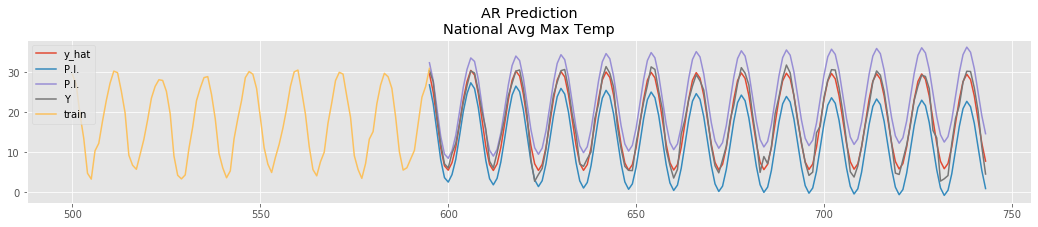

In [165]:
plt.plot(np.arange(595,744,1),forecast, label='y_hat')
plt.plot(np.arange(595,744,1),conf, label='P.I.')
plt.plot(np.arange(595,744,1),test.avg_maxtemp.values, label='Y')
plt.plot(np.arange(500,596,1), train.avg_maxtemp.values[499:], label='train')
plt.legend()
plt.title("AR Prediction\nNational Avg Max Temp")
#plt.show()
fig = plt.gcf()
fig.set_size_inches(18, 3)

In [166]:
perf_in = {}

In [167]:
perf_in['AR(12)'] = testing.measure_error(test.avg_maxtemp, forecast,label='AR(12)')

+------------+---------------------+
|   metric   |        value        |
+------------+---------------------+
|   label    |        AR(12)       |
|    RMSE    |  1.5827912376884534 |
| RMSE_pcent | 0.08823179321577464 |
+------------+---------------------+


#### b) Fourier Series

In [168]:
X_f = []
for n,a in enumerate(train.avg_maxtemp):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    print(x)
    X_f +=[x]

[1, 0, 0.0, 1.0]
[1, 1, 0.49999999999999994, 0.8660254037844387]
[1, 2, 0.8660254037844386, 0.5000000000000001]
[1, 3, 1.0, 6.123233995736766e-17]
[1, 4, 0.8660254037844388, -0.4999999999999998]
[1, 5, 0.49999999999999994, -0.8660254037844387]
[1, 6, 1.2246467991473532e-16, -1.0]
[1, 7, -0.4999999999999998, -0.8660254037844388]
[1, 8, -0.8660254037844384, -0.5000000000000004]
[1, 9, -1.0, -1.8369701987210297e-16]
[1, 10, -0.8660254037844386, 0.5]
[1, 11, -0.5000000000000004, 0.8660254037844384]
[1, 12, -2.4492935982947064e-16, 1.0]
[1, 13, 0.5, 0.8660254037844386]
[1, 14, 0.8660254037844384, 0.5000000000000006]
[1, 15, 1.0, 1.1943401194869635e-15]
[1, 16, 0.8660254037844392, -0.49999999999999917]
[1, 17, 0.4999999999999998, -0.8660254037844388]
[1, 18, 3.6739403974420594e-16, -1.0]
[1, 19, -0.49999999999999917, -0.8660254037844392]
[1, 20, -0.8660254037844387, -0.49999999999999983]
[1, 21, -1.0, -4.286263797015736e-16]
[1, 22, -0.8660254037844392, 0.4999999999999991]
[1, 23, -0.5000000

In [171]:
reg = sm.OLS(train.avg_maxtemp, X_f)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            avg_maxtemp   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     7553.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:11:58   Log-Likelihood:                -1070.6
No. Observations:                 595   AIC:                             2149.
Df Residuals:                     591   BIC:                             2167.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8653      0.120    148.637      0.000      17.629      18.101
x1            -0.0007      0.000     -1.994      0.047      -0.001   -1.05e-05
x2            -0.7397      0.085     -8.685      0.000      -0.907      -0.572
x3           -12.7769      0.085   -150.272      0.000     -12.944     -12.610
==============================================================================
Omnibus:                       11.209   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               19.489
Skew:                          -0.016   Prob(JB):                     5.86e-05
Kurtosis:                       3.886   Cond. No.                         685.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

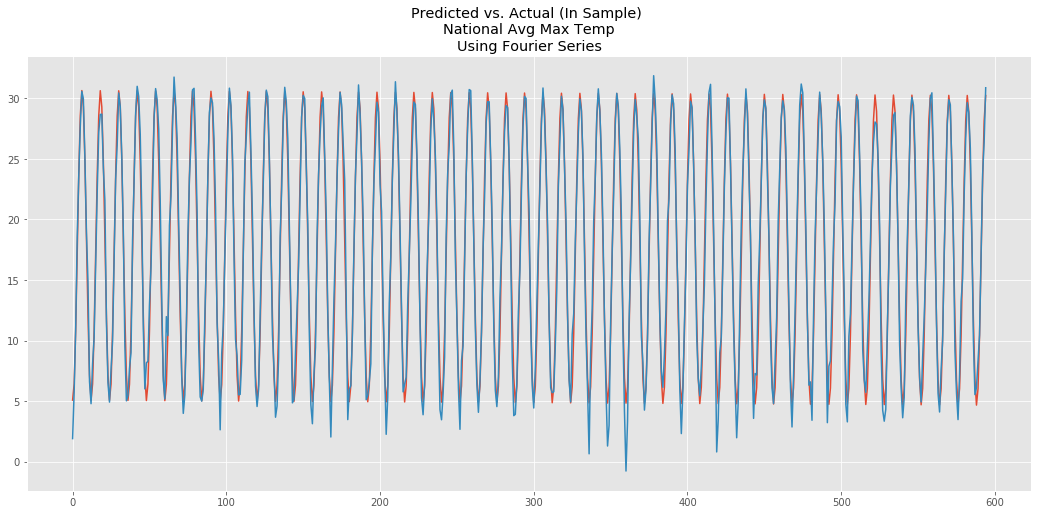

In [173]:
Y_hat = results.predict(X_f)
plt.plot(Y_hat, label='Y_hat')
plt.plot(train.avg_maxtemp, label='Y')
plt.title('Predicted vs. Actual (In Sample) \nNational Avg Max Temp\nUsing Fourier Series')
fig = plt.gcf()
fig.set_size_inches(18, 8)

In [174]:
perf_in['Fourier'] = testing.measure_error(train.avg_maxtemp, Y_hat, label='Fourier Series')

+------------+---------------------+
|   metric   |        value        |
+------------+---------------------+
|   label    |    Fourier Series   |
|    RMSE    |  1.4628062197077776 |
| RMSE_pcent | 0.08286338420423899 |
+------------+---------------------+


In [175]:
i = len(train.avg_maxtemp)
X_pred = []
for n,(d,p) in enumerate(test.avg_maxtemp.items()):
    m = n+i
    x = [1, m, np.sin(2 * m * np.pi / 12), np.cos(2 * m * np.pi / 12)]
    X_pred += [x]
X_pred[:4]

[[1, 595, -0.4999999999999767, -0.8660254037844521],
 [1, 596, -0.8660254037844337, -0.5000000000000085],
 [1, 597, -1.0, -4.9488729278921426e-14],
 [1, 598, -0.8660254037844548, 0.49999999999997197]]

In [176]:
Y_pred = results.predict(X_pred)
(train.avg_maxtemp, Y_hat) = plot_and_undo_boxcox(bc, Y_pred, 'Fourier Series', in_sample=False)
perf_out['Fourier'] = testing.measure_error(Y_plain, Y_hat_plain, label='Fourier Series')
perf_out['Fourier']

NameError: name 'plot_and_undo_boxcox' is not defined

In [177]:
Y_hat = results.predict(X_f)
(Y_plain, Y_hat_plain) = plot_and_undo_boxcox(bc, Y_hat, 'Fourier Series', in_sample=True)

NameError: name 'plot_and_undo_boxcox' is not defined

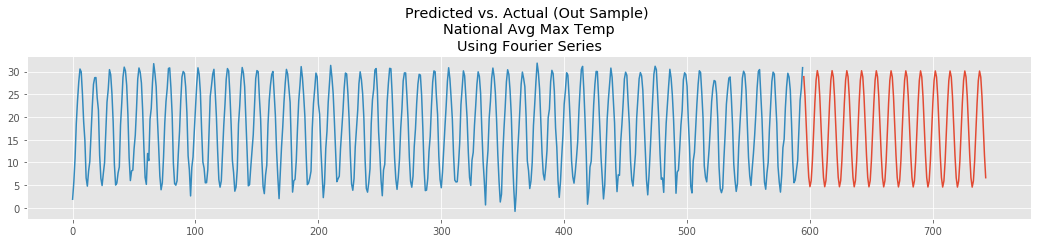

In [180]:
Y_pred = results.predict(X_pred)
plt.plot(range(len(train),len(train)+len(Y_pred)),Y_pred, label='Y_pred')
plt.plot(train.avg_maxtemp, label='Y')
plt.title('Predicted vs. Actual (Out Sample) \nNational Avg Max Temp\nUsing Fourier Series')
fig = plt.gcf()
fig.set_size_inches(18, 3)

### Forecast Volatility

#### a) ARCH Model

In [183]:
from arch import arch_model

In [184]:
model = arch_model(train['diff_maxtemp'][1:], mean='Constant', vol='ARCH',dist='gaussian',p=14)
f_arch = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 1801.371671704333
Iteration:      2,   Func. Count:     37,   Neg. LLF: 1792.1450775920396
Iteration:      3,   Func. Count:     56,   Neg. LLF: 1788.4123379679513
Iteration:      4,   Func. Count:     74,   Neg. LLF: 1767.7768338000556
Iteration:      5,   Func. Count:     93,   Neg. LLF: 1762.1697687441613
Iteration:      6,   Func. Count:    112,   Neg. LLF: 1756.2312918873167
Iteration:      7,   Func. Count:    130,   Neg. LLF: 1733.8447059800276
Iteration:      8,   Func. Count:    149,   Neg. LLF: 1708.7053482135195
Iteration:      9,   Func. Count:    170,   Neg. LLF: 1707.4633514874076
Iteration:     10,   Func. Count:    189,   Neg. LLF: 1703.3763533300985
Iteration:     11,   Func. Count:    208,   Neg. LLF: 1698.5943548576176
Iteration:     12,   Func. Count:    227,   Neg. LLF: 1693.6328198019185
Iteration:     13,   Func. Count:    246,   Neg. LLF: 1692.283992917553
Iteration:     14,   Func. Count:    265,   Neg. LLF:

In [185]:
from statsmodels.tsa.ar_model import AR,ARResults

In [186]:
model = AR(train)
ARfit = model.fit(ic='t-stat')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [187]:
start=len(train)
end=len(train)+len(test)-1
ar_predictions = ARfit.predict(start=start, end=end, dynamic=False)

NameError: name 'ARfit' is not defined

### 6. What do you recommend as next steps in this analysis? What policy recommendations do you recommend?

References

In [ ]:
# https://science2017.globalchange.gov/chapter/6/

In [ ]:
## Global Aridity Index and Potential Evapotranspiration (ET0) Climate Database
# https://figshare.com/articles/Global_Aridity_Index_and_Potential_Evapotranspiration_ET0_Climate_Database_v2/7504448/3

In [ ]:
## Drought Monitor
# https://droughtmonitor.unl.edu/Data.aspx
# only has data starting 2000